In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import sys
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [199]:
import sys
print(sys.executable)

c:\Users\shast\AppData\Local\Programs\Python\Python312\python.exe


In [200]:
import wordcloud
print(wordcloud.__version__)


1.9.4


In [201]:
from wordcloud import WordCloud

In [202]:
df=pd.read_csv("E:\MDTM40\Project5_AI_Echo_NLP\chatgpt_style_reviews_dataset.xlsx - Sheet1.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [203]:
df.describe()

,rating,helpful_votes,review_length
count,50.000000,50.000000,50.000000
mean,3.000000,60.320000,13.400000
std,1.340119,25.288894,3.505098
min,1.000000,9.000000,7.000000
25%,2.000000,39.000000,10.000000
50%,3.000000,62.000000,13.000000
75%,4.000000,85.750000,16.000000
max,5.000000,99.000000,21.000000


In [204]:
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [205]:
df.shape

(50, 12)

In [206]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [207]:
df.dtypes

date                 object
title                object
review               object
rating                int64
username             object
helpful_votes         int64
review_length         int64
platform             object
language             object
location             object
version              object
verified_purchase    object
dtype: object

EDA - Analysing features

In [208]:
df['rating'].value_counts()

rating
2    13
3    13
5    10
1     7
4     7
Name: count, dtype: int64

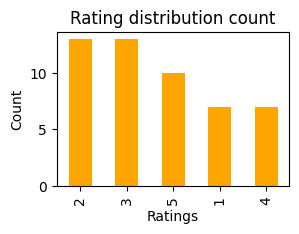

In [209]:
#Bar plot to visualize the total counts of each rating

plt.figure(figsize=(3,2))
df['rating'].value_counts().plot.bar(color = 'orange')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [210]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(df['rating'].value_counts()/df.shape[0]*100,2)}")


Rating value count - percentage distribution: 
rating
2    26.0
3    26.0
5    20.0
1    14.0
4    14.0
Name: count, dtype: float64


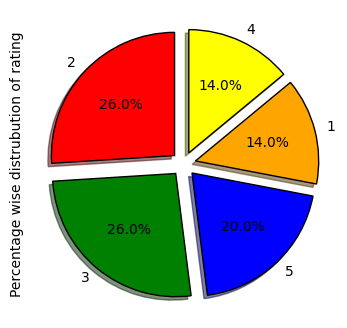

In [211]:
fig = plt.figure(figsize=(4,4))
colors = ('red', 'green', 'blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
tags = df['rating'].value_counts()/df.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")


In [212]:
df['verified_purchase'].value_counts()

verified_purchase
No     30
Yes    20
Name: count, dtype: int64

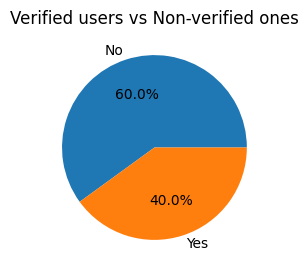

In [233]:
plt.figure(figsize=(3,3))
plt.pie(df['verified_purchase'].value_counts(), labels=df['verified_purchase'].unique(), autopct='%1.1f%%')
plt.title("Verified users vs Non-verified ones")
plt.show()

In [213]:
df.groupby('rating').agg({'helpful_votes': 'sum'})

,helpful_votes
rating,
1,437
2,715
3,859
4,334
5,671


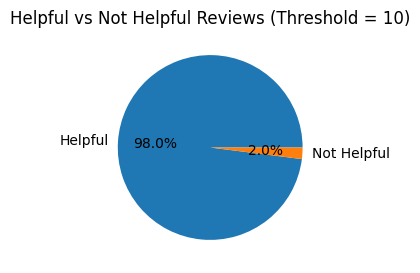

In [214]:
threshold = 10

df['helpful_flag'] = "Not Helpful"
df.loc[df['helpful_votes'] > threshold, 'helpful_flag'] = "Helpful"

helpful_counts = df['helpful_flag'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(
    helpful_counts, 
    labels=helpful_counts.index, 
    autopct='%1.1f%%')
plt.title("Helpful vs Not Helpful Reviews (Threshold = 10)")
plt.show()


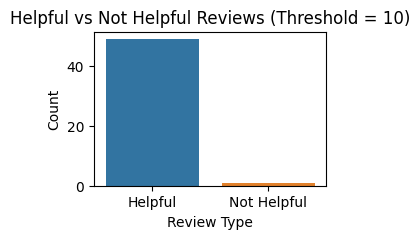

In [215]:
# helpful_voting - bar chart
plt.figure(figsize=(3,2))
sns.countplot(data=df, x='helpful_flag', hue='helpful_flag')
plt.title("Helpful vs Not Helpful Reviews (Threshold = 10)")
plt.ylabel("Count")
plt.xlabel("Review Type")
plt.show()


In [216]:
# process date separately
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek


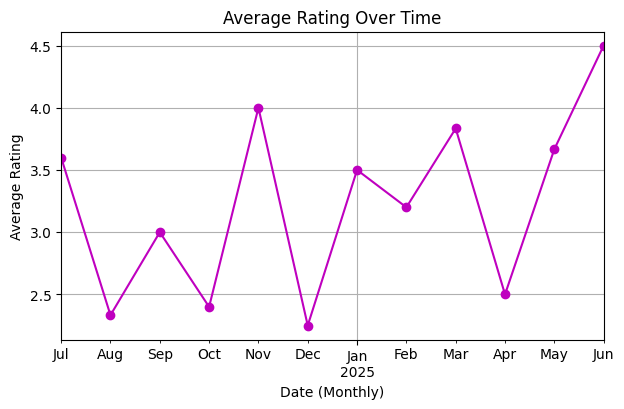

In [217]:
# average rating changed over time
avg_rating = df.groupby(df['date'].dt.to_period('M'))['rating'].mean()

# Plot
plt.figure(figsize=(7,4))
avg_rating.plot(kind='line', marker='o', color='m')
plt.title("Average Rating Over Time")
plt.xlabel("Date (Monthly)")
plt.ylabel("Average Rating")
plt.grid(True)

plt.show()


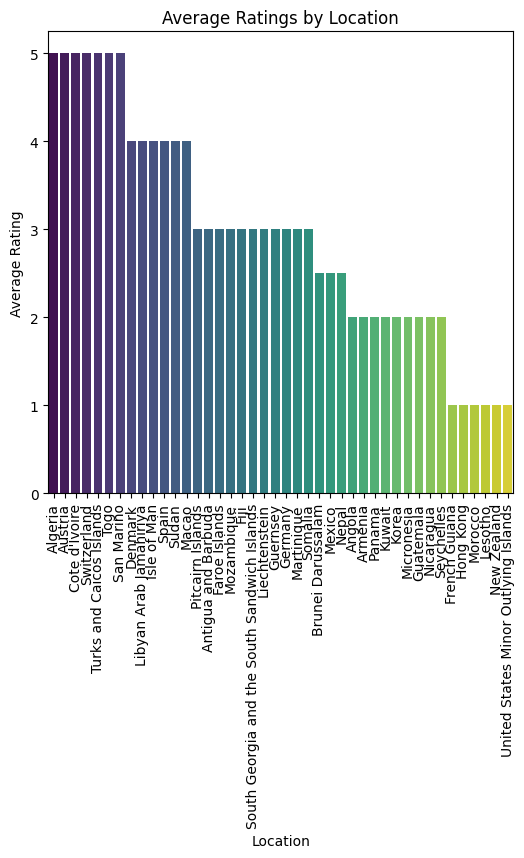

In [219]:
rating_location = df.groupby('location')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,6))
sns.barplot(x=rating_location.index, y=rating_location.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Ratings by Location")
plt.ylabel("Average Rating")
plt.xlabel("Location")
plt.show()

In [220]:
df['platform'].value_counts()

platform
Flipkart       15
App Store      15
Amazon         11
Google Play     9
Name: count, dtype: int64

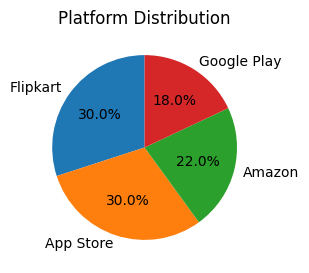

In [221]:
df['platform'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(3,3), startangle=90)
plt.title("Platform Distribution")
plt.ylabel("") 
plt.show()

In [224]:
avg_rating_platform=df.groupby('platform')['rating'].mean().sort_values(ascending=False)
avg_rating_platform

platform
App Store      3.333333
Amazon         3.272727
Flipkart       2.800000
Google Play    2.444444
Name: rating, dtype: float64

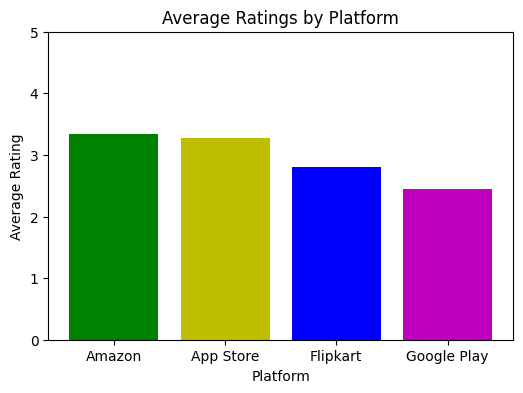

In [229]:
data_plat=sorted(df["platform"].dropna().unique())
plt.figure(figsize=(6,4))
plt.bar(data_plat,avg_rating_platform, color=['g','y','b','m'])
plt.title('Average Ratings by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.ylim(0,5)
plt.show()

In [239]:
# average length of reviews per rating category
avg_length_review=df.groupby('review_length')['rating'].mean().sort_values(ascending=False)
avg_length_review_df = avg_length_review.reset_index()
avg_length_review_df

,review_length,rating
0,7,5.000000
1,17,4.000000
2,10,3.666667
3,14,3.166667
4,9,3.000000
5,12,3.000000
6,18,3.000000
7,13,3.000000
8,11,2.750000
9,19,2.600000


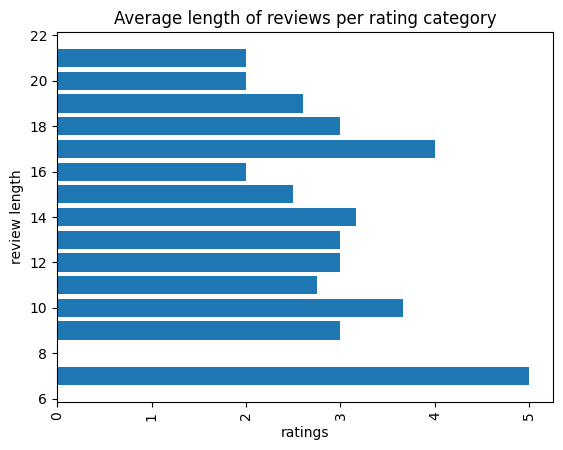

In [249]:
plt.barh(avg_length_review_df['review_length'], avg_length_review_df['rating'])
plt.xlabel("ratings")
plt.ylabel("review length")
plt.xticks(rotation=90)
plt.title("Average length of reviews per rating category")
plt.show()

In [136]:
df['location'].value_counts()

location
Denmark                                         3
Nepal                                           2
Brunei Darussalam                               2
Macao                                           2
Liechtenstein                                   2
Mexico                                          2
Isle of Man                                     2
Panama                                          1
United States Minor Outlying Islands            1
Spain                                           1
Guatemala                                       1
Hong Kong                                       1
Antigua and Barbuda                             1
Kuwait                                          1
Switzerland                                     1
South Georgia and the South Sandwich Islands    1
Seychelles                                      1
French Guiana                                   1
Cote d'Ivoire                                   1
Faroe Islands                            

In [137]:
df['language'].value_counts()

language
en    19
fr    13
es    10
de     8
Name: count, dtype: int64

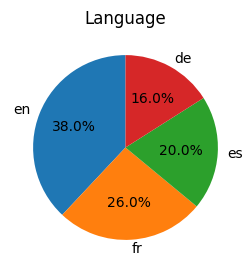

In [138]:
df['language'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(3,3), startangle=90)
plt.title("Language")
plt.ylabel("") 
plt.show()

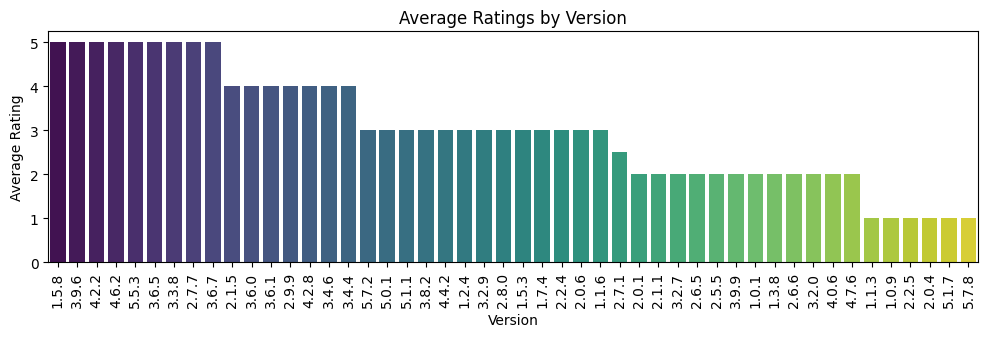

In [261]:
avg_version_rating = df.groupby('version')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,3))
sns.barplot(x=avg_version_rating.index, y=avg_version_rating.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Ratings by Version")
plt.ylabel("Average Rating")
plt.xlabel("Version")
plt.show()

In [139]:
#from wordcloud import WordCloud

In [140]:
def rating_to_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['rating'].apply(rating_to_sentiment)
df['sentiment'].value_counts()


sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64

In [141]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,helpful_flag,year,month,day,dayofweek,sentiment
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,Helpful,2024,12,24,1,Negative
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,Helpful,2024,7,26,4,Negative
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,Helpful,2024,8,22,3,Positive
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,Helpful,2025,4,24,3,Neutral
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,Helpful,2024,8,15,3,Negative


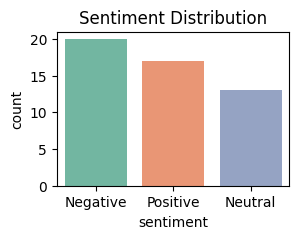

In [142]:
plt.figure(figsize=(3,2))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.show()

Text Processing

In [143]:
# converting sentences to lower case letter
df['title'] = df['title'].str.lower()
df['title'].head()

0     east list local interesting far magazine father.
1    road determine picture figure hard experience ...
2                   policy social past analysis whole.
3                 news financial billion four foreign.
4                  to skill she case sing stop likely.
Name: title, dtype: object

In [144]:
# removing extra white space
def remove_whitespace(text):
  return " ".join(text.split())

df['title'] = df['title'].apply(remove_whitespace)
df['title'].head(3)

0     east list local interesting far magazine father.
1    road determine picture figure hard experience ...
2                   policy social past analysis whole.
Name: title, dtype: object

In [145]:
# Tokenization
from nltk import word_tokenize
df['title']=df['title'].apply(lambda X: word_tokenize(X))
df['title'].head(3)

0    [east, list, local, interesting, far, magazine...
1    [road, determine, picture, figure, hard, exper...
2           [policy, social, past, analysis, whole, .]
Name: title, dtype: object

In [146]:
# stopword removal
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
print(stopwords.words('english'))

en_stopwords = stopwords.words('english')

def remove_stopwords(text):
   result = []
   for token in text:
       if token not in en_stopwords:
           result.append(token)
   return result

df['title'] = df['title'].apply(remove_stopwords)
df['title'].head(3)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [east, list, local, interesting, far, magazine...
1    [road, determine, picture, figure, hard, exper...
2           [policy, social, past, analysis, whole, .]
Name: title, dtype: object

In [147]:
# Removing special characters
from nltk.tokenize import RegexpTokenizer
def remove_punct(text):
   tokenizer = RegexpTokenizer(r"\w+")
   lst=tokenizer.tokenize(' '.join(text))
   return lst
df['title'] = df['title'].apply(remove_punct)
df['title'].head(3)

0    [east, list, local, interesting, far, magazine...
1    [road, determine, picture, figure, hard, exper...
2              [policy, social, past, analysis, whole]
Name: title, dtype: object

In [148]:
# Lemmetization and Stemming
import nltk
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import nltk
nltk.download('averaged_perceptron_tagger_eng')

def lemmatization(text):
   result=[]
   wordnet = WordNetLemmatizer()
   for token,tag in pos_tag(text):
       pos=tag[0].lower()

       if pos not in ['a', 'r', 'n', 'v']:
           pos='n'

       result.append(wordnet.lemmatize(token,pos))

   return result
df['title'] = df['title'].apply(lemmatization)
df['title'].head(3)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


0    [east, list, local, interest, far, magazine, f...
1    [road, determine, picture, figure, hard, exper...
2              [policy, social, past, analysis, whole]
Name: title, dtype: object

In [149]:
# from nltk.stem import PorterStemmer

# def stemming(text):
#    porter = PorterStemmer()

#    result=[]
#    for word in text:
#        result.append(porter.stem(word))
#    return result
# df['title'] = df['title'].apply(stemming)
# df['title'].head(3)

In [150]:
df.head(5)

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,helpful_flag,year,month,day,dayofweek,sentiment
0,2024-12-24,"[east, list, local, interest, far, magazine, f...",Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,Helpful,2024,12,24,1,Negative
1,2024-07-26,"[road, determine, picture, figure, hard, exper...",Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,Helpful,2024,7,26,4,Negative
2,2024-08-22,"[policy, social, past, analysis, whole]",Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,Helpful,2024,8,22,3,Positive
3,2025-04-24,"[news, financial, billion, four, foreign]",Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,Helpful,2025,4,24,3,Neutral
4,2024-08-15,"[skill, case, sing, stop, likely]",Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,Helpful,2024,8,15,3,Negative


Text processing in Review column

In [151]:
# stopwords
en_stopwords = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. lowercase
    text = text.lower()
    
    # 2. remove extra spaces
    text = " ".join(text.split())
    
    # 3. tokenize
    tokens = word_tokenize(text)
    
    # 4. remove stopwords
    tokens = [t for t in tokens if t not in en_stopwords]
    
    # 5. remove special characters/punctuation
    tokens = tokenizer.tokenize(" ".join(tokens))
    
    # 6. lemmatization
    result = []
    for token, tag in pos_tag(tokens):
        pos = tag[0].lower()
        if pos not in ['a', 'r', 'n', 'v']:
            pos = 'n'
        result.append(lemmatizer.lemmatize(token, pos))
    
    return result

df['review'] = df['review'].apply(preprocess_text)
df['review'].head(3)

0    [impressive, natural, language, understand, al...
1    [sometimes, give, wrong, answer, outdated, inf...
2    [great, tool, generate, content, quickly, inte...
Name: review, dtype: object

In [152]:
df.head(3)

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,helpful_flag,year,month,day,dayofweek,sentiment
0,2024-12-24,"[east, list, local, interest, far, magazine, f...","[impressive, natural, language, understand, al...",1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,Helpful,2024,12,24,1,Negative
1,2024-07-26,"[road, determine, picture, figure, hard, exper...","[sometimes, give, wrong, answer, outdated, inf...",2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,Helpful,2024,7,26,4,Negative
2,2024-08-22,"[policy, social, past, analysis, whole]","[great, tool, generate, content, quickly, inte...",5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,Helpful,2024,8,22,3,Positive


In [153]:
# combine both into one column
df['title'] = df['title'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
df['review'] = df['review'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

df['text'] = df['title'] + " " + df['review']
df.head(3)

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,helpful_flag,year,month,day,dayofweek,sentiment,text
0,2024-12-24,east list local interest far magazine father,impressive natural language understand almost ...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,Helpful,2024,12,24,1,Negative,east list local interest far magazine father i...
1,2024-07-26,road determine picture figure hard experience red,sometimes give wrong answer outdated info stud...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,Helpful,2024,7,26,4,Negative,road determine picture figure hard experience ...
2,2024-08-22,policy social past analysis whole,great tool generate content quickly interest e...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,Helpful,2024,8,22,3,Positive,policy social past analysis whole great tool g...


Using Wordcloud

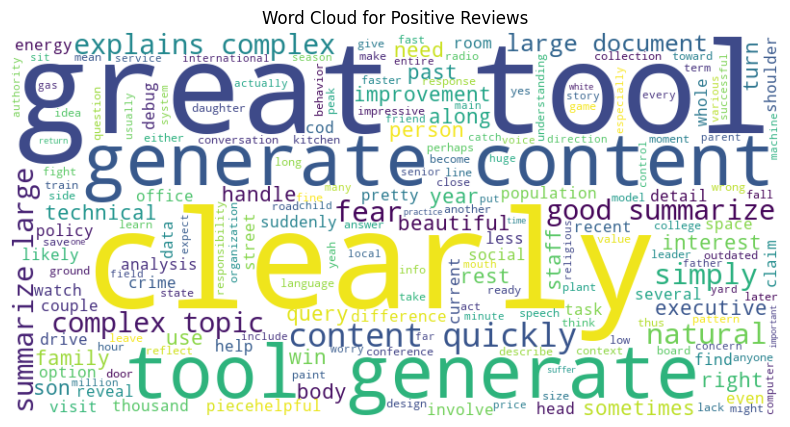

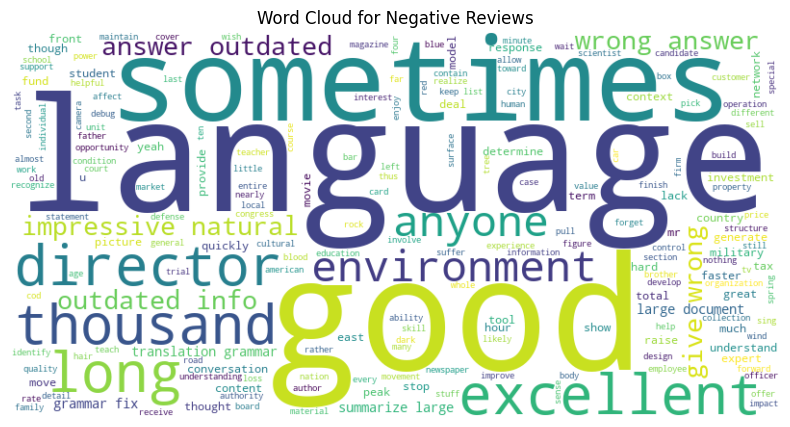

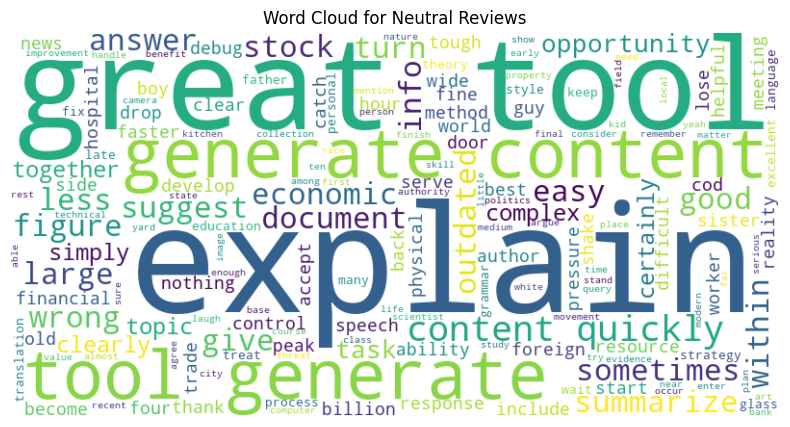

In [154]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot word cloud for a sentiment
def plot_wordcloud(df, sentiment, col="text"):
    text = " ".join(df[df['sentiment'] == sentiment][col].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="viridis").generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Reviews")
    plt.show()

# Positive reviews
plot_wordcloud(df, sentiment="Positive", col="text")

# Negative reviews
plot_wordcloud(df, sentiment="Negative", col="text")

# Neutral reviews
plot_wordcloud(df, sentiment="Neutral", col="text")


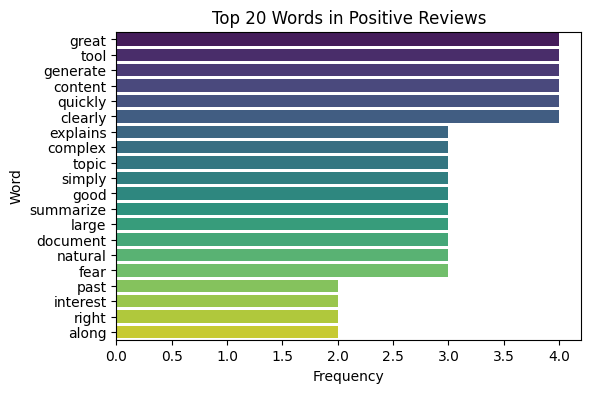

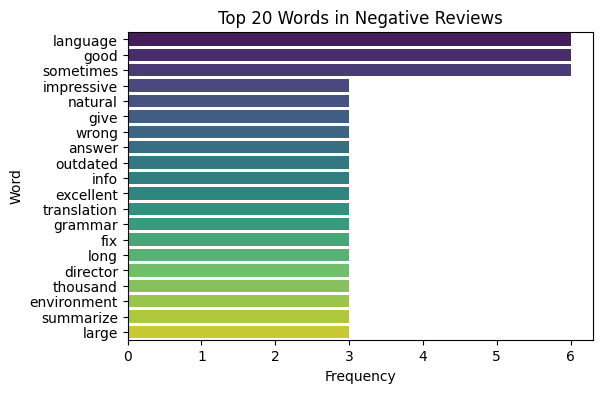

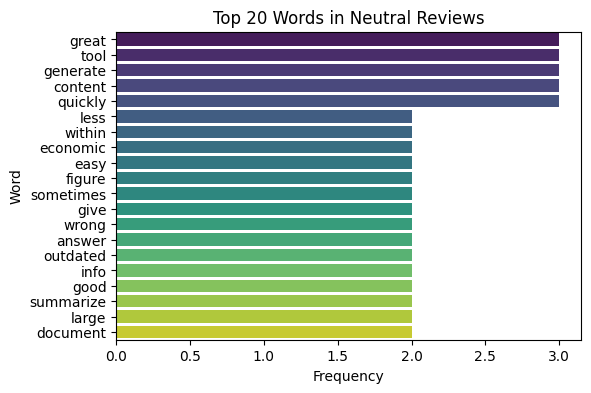

In [155]:
from collections import Counter
import seaborn as sns

def plot_top_words(df, sentiment, col="text", n=20):
    words = " ".join(df[df['sentiment']==sentiment][col].astype(str)).split()
    common_words = Counter(words).most_common(n)
    
    word_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    
    plt.figure(figsize=(6,4))
    sns.barplot(x='Frequency', y='Word', data=word_df, palette="viridis")
    plt.title(f"Top {n} Words in {sentiment} Reviews")
    plt.show()

# Example
plot_top_words(df, "Positive")
plot_top_words(df, "Negative")
plot_top_words(df, "Neutral")


In [156]:
df.dtypes

date                 datetime64[ns]
title                        object
review                       object
rating                        int64
username                     object
helpful_votes                 int64
review_length                 int64
platform                     object
language                     object
location                     object
version                      object
verified_purchase            object
helpful_flag                 object
year                          int32
month                         int32
day                           int32
dayofweek                     int32
sentiment                    object
text                         object
dtype: object

In [157]:
# Encoding
en=df.select_dtypes(include='object').columns
en

Index(['title', 'review', 'username', 'platform', 'language', 'location',
       'version', 'verified_purchase', 'helpful_flag', 'sentiment', 'text'],
      dtype='object')

In [158]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
cols = ['platform', 'language', 'location', 'version', 'verified_purchase']
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # ensure string dtype
    encoders[col] = le

# # process date separately
# df['date'] = pd.to_datetime(df['date'], errors='coerce')
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day
# df['dayofweek'] = df['date'].dt.dayofweek
# df = df.drop(columns=['date'])

# encode target sentiment
target_encoder = LabelEncoder()
df['sentiment'] = target_encoder.fit_transform(df['sentiment'])

In [159]:
from sklearn.model_selection import train_test_split

x = df[['rating', 'helpful_votes', 'review_length', 'platform', 'language', 'location', 'version', 'verified_purchase', 'text']]
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 225)

In [160]:
x.columns

Index(['rating', 'helpful_votes', 'review_length', 'platform', 'language',
       'location', 'version', 'verified_purchase', 'text'],
      dtype='object')

In [161]:
# Separate text for NLP
train_text = x_train['text']
test_text = x_test['text']

# Other structured features (without text)
X_train_other = x_train.drop(columns=['text'])
X_test_other = x_test.drop(columns=['text'])


In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

tfidf = TfidfVectorizer() 
X_train_tfidf = tfidf.fit_transform(train_text)
X_test_tfidf = tfidf.transform(test_text)

X_train_final = hstack([X_train_tfidf, X_train_other])
X_test_final = hstack([X_test_tfidf, X_test_other])

print("Shape of X_train:", X_train_final.shape)
print("Shape of X_test:", X_test_final.shape)

Shape of X_train: (40, 403)
Shape of X_test: (10, 403)


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train
lr_model = LogisticRegression(max_iter=1000) 
lr_model.fit(X_train_final, y_train)

# Predict on test set (not train)
y_pred = lr_model.predict(X_test_final)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7
Confusion Matrix:
 [[5 0 0]
 [2 1 0]
 [0 1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.50      0.33      0.40         3
           2       1.00      0.50      0.67         2

    accuracy                           0.70        10
   macro avg       0.74      0.61      0.63        10
weighted avg       0.71      0.70      0.67        10



In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train_final, y_train)

# Predict on test set (not train)
y_pred = rf_model.predict(X_test_final)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8
Confusion Matrix:
 [[5 0 0]
 [1 1 1]
 [0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.33      0.50         3
           2       0.67      1.00      0.80         2

    accuracy                           0.80        10
   macro avg       0.83      0.78      0.74        10
weighted avg       0.85      0.80      0.76        10



In [165]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Define parameter grid
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

# Create base model
rf = RandomForestClassifier(random_state=42, class_weight="balanced")

# RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,              # number of random combinations
    cv=3,                   # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1               # use all CPUs
)

# Fit
rand_search.fit(X_train_final, y_train)

# Best params
print("Best Parameters:", rand_search.best_params_)

# Evaluate on test set
best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 30, 'bootstrap': True}
Accuracy: 1.0
Confusion Matrix:
 [[5 0 0]
 [0 3 0]
 [0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [166]:
#xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize XGBoost model
xgb_model = XGBClassifier()

# Train on training data
xgb_model.fit(X_train_final, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test_final)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[5 0 0]
 [0 3 0]
 [0 0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [167]:
# Create sample text 
sample_text = ["The movie was excellent and I loved it! keep up the work team, great work"]

# Create structured features with SAME columns as training
sample_structured = pd.DataFrame([{
    'rating':4,
    'helpful_votes': 10,
    'review_length': 50,
    'platform': 1,
    'language': 0,
    'location': 3,
    'version': 2,
    'verified_purchase': 1,
}])

# Ensure column order matches training data
sample_structured = sample_structured[X_train_other.columns]

# Transform text
sample_tfidf = tfidf.transform(sample_text)

# ---- Step 4: Combine text + structured ----
from scipy.sparse import hstack
sample_combined = hstack([sample_tfidf, sample_structured])

# ---- Step 5: Predict ----
pred = xgb_model.predict(sample_combined)
print("Predicted Sentiment:", target_encoder.inverse_transform(pred)[0])


Predicted Sentiment: Positive


Pickling

In [168]:
with open('labelencoder.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [169]:
# save the model
with open('tfidf_vectorizer_model.pkl', 'wb') as file_vec:
    pickle.dump(tfidf, file_vec)

In [170]:
# Load the model
with open('tfidf_vectorizer_model.pkl','rb') as filev:
    loaded_model = pickle.load(filev)
loaded_model

TfidfVectorizer()

In [171]:
# save the model
with open('xgboost_model.pkl', 'wb') as filename:
    pickle.dump(xgb_model, filename)

In [172]:
# save the model
with open('randfor_model.pkl', 'wb') as file_rf:
    pickle.dump(rf_model, file_rf)